# Multilayer Percepton First exercise Panagiotis Tamvakidis

In [19]:
import tensorflow as tf
import keras as kr
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation

# Getting the data & Normalization
After some tries I came with the result that I had to normalize the data after splitting them into train and test.

In [20]:
dataset = pd.read_csv('C:/Users/athanasis/Desktop/Semester_B/DEEP_LEARNING/digit_recognizer_dataset.csv', sep=',')
label = dataset.iloc[:,0]

features =  dataset.iloc[:,1:]
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.30)

print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
# normalize to range 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
# return normalized images

X_train shape (29400, 784)
y_train shape (29400,)
X_test shape (12600, 784)
y_test shape (12600,)


# First Part of the exercise
In this part is implemented the structure of the model as described in the given specs.
The model was built with one hidden layer and with relu activation.
The input shape (784) is calculated from the pixels from the length and width 28x28 =784.
The number of epochs and batch as long as the shapes of the layers and the activation functions were specified according to the given specs.

In [21]:
def first_part(X_train, X_test, y_train, y_test):

        model = Sequential()
        model.add(Dense(10, input_shape=(784,)))
        model.add(Activation('relu'))


        model.add(Dense(10))
        model.add(Activation('relu'))

        model.add(Dense(10))
        model.add(Activation('softmax'))



        batch_size = 64
        model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1),
                      loss="sparse_categorical_crossentropy",
                      metrics=['accuracy'])

        model.fit(X_train,y_train, batch_size=batch_size, epochs=10)



        loss, accuracy = model.evaluate(X_test,y_test)
        print("Accuracy for the starting part ",accuracy)
        return (loss, accuracy)

# Second Part Of the exercise
In this part of the exercise there many changes in the structure of the model:


    -A new hidden layer has added
    -The batch size now is 16 
    -Optimizer changed to Adagrad
    -The input and the hidden layers now have more units (1024 ,512)
    -For keras implementation the glorot_uniform (Xavier) weight initiallizer is the default. 
   

In [26]:
def second_part(X_train, X_test, y_train, y_test):
    model = Sequential()
    model.add(Dense(1024, input_shape=(784,)))
    model.add(Activation('relu'))


    model.add(Dense(512))
    model.add(Activation('relu'))

    model.add(Dense(512))
    model.add(Activation('relu'))

    model.add(Dense(10))
    model.add(Activation('softmax'))

    batch_size = 64
    model.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.07),
                  loss="sparse_categorical_crossentropy",
                  metrics=['accuracy'])

    hyp_hist = model.fit(X_train, y_train, batch_size=batch_size, epochs=22)

    loss, accuracy = model.evaluate(X_test, y_test)
    print("Accuracy for the Hyperparameter part ", accuracy)
    return (loss,accuracy,hyp_hist)


# Displaying the results of the first part of the exercise

In [23]:
bef_loss, bef_acc =  first_part(X_train, X_test, y_train, y_test)

print('======== Before =======')
print('Loss ',bef_loss ,'& Accuracy ', bef_acc )

Epoch 1/10
29400/29400 [==============================] - 3s 93us/step - loss: 0.9393 - accuracy: 0.6929
Epoch 2/10
29400/29400 [==============================] - 3s 88us/step - loss: 0.4362 - accuracy: 0.8692
Epoch 3/10
29400/29400 [==============================] - 3s 96us/step - loss: 0.3540 - accuracy: 0.8959
Epoch 4/10
29400/29400 [==============================] - 3s 94us/step - loss: 0.3122 - accuracy: 0.9070
Epoch 5/10
29400/29400 [==============================] - 3s 88us/step - loss: 0.2922 - accuracy: 0.9148
Epoch 6/10
29400/29400 [==============================] - 3s 92us/step - loss: 0.2730 - accuracy: 0.9203
Epoch 7/10
29400/29400 [==============================] - 3s 96us/step - loss: 0.2611 - accuracy: 0.9243
Epoch 8/10
29400/29400 [==============================] - 3s 92us/step - loss: 0.2494 - accuracy: 0.9270
Epoch 9/10
29400/29400 [==============================] - 3s 106us/step - loss: 0.2394 - accuracy: 0.9314
Epoch 10/10
12600/12600 [=============================

# Displaying the results of the second part of the exercise
Afte the specific modifications of the model that described above, the accuracy of the model reaches much better results.

In [27]:
hyp_loss, hyp_acc,hyp_hist = second_part(X_train, X_test, y_train, y_test)
print("History",hyp_hist.history)
print('======== After Parameter Tuning =======')
print('Loss ',hyp_loss ,'& Accuracy ', hyp_acc )


Epoch 1/22
29400/29400 [==============================] - 16s 532us/step - loss: 0.3504 - accuracy: 0.8917
Epoch 2/22
29400/29400 [==============================] - 16s 544us/step - loss: 0.1218 - accuracy: 0.9621
Epoch 3/22
29400/29400 [==============================] - 16s 529us/step - loss: 0.0734 - accuracy: 0.9774
Epoch 4/22
29400/29400 [==============================] - 16s 527us/step - loss: 0.0496 - accuracy: 0.9840
Epoch 5/22
29400/29400 [==============================] - 16s 560us/step - loss: 0.0314 - accuracy: 0.9907
Epoch 6/22
29400/29400 [==============================] - 16s 539us/step - loss: 0.0188 - accuracy: 0.9951
Epoch 7/22
29400/29400 [==============================] - 16s 539us/step - loss: 0.0139 - accuracy: 0.9965
Epoch 8/22
29400/29400 [==============================] - 16s 530us/step - loss: 0.0078 - accuracy: 0.9979
Epoch 9/22
29400/29400 [==============================] - 16s 534us/step - loss: 0.0027 - accuracy: 0.9997
Epoch 10/22
29400/29400 [============

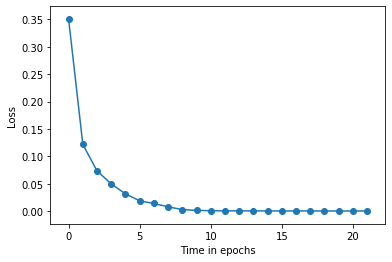

In [28]:
plt.figure()
plt.plot(np.arange(len(hyp_hist.history['loss'])), hyp_hist.history['loss'])
plt.scatter(np.arange(len(hyp_hist.history['loss'])), hyp_hist.history['loss'])
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()